In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [6]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [7]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


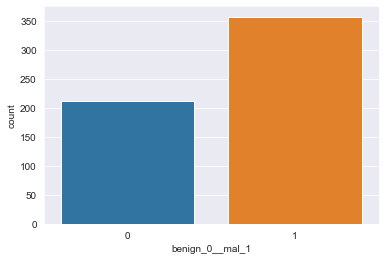

In [15]:
sns.countplot(x='benign_0__mal_1',data=df)

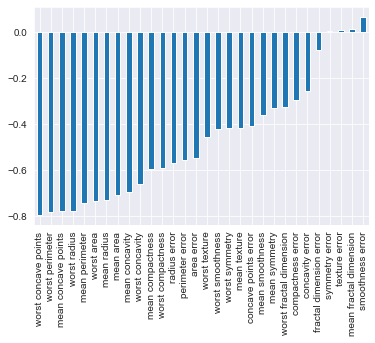

In [43]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [54]:
bm1.corr()['benign_0__mal_1']

mean radius               NaN
mean texture              NaN
mean perimeter            NaN
mean area                 NaN
mean smoothness           NaN
mean compactness          NaN
mean concavity            NaN
mean concave points       NaN
mean symmetry             NaN
mean fractal dimension    NaN
radius error              NaN
texture error             NaN
perimeter error           NaN
area error                NaN
smoothness error          NaN
compactness error         NaN
concavity error           NaN
concave points error      NaN
symmetry error            NaN
fractal dimension error   NaN
worst radius              NaN
worst texture             NaN
worst perimeter           NaN
worst area                NaN
worst smoothness          NaN
worst compactness         NaN
worst concavity           NaN
worst concave points      NaN
worst symmetry            NaN
worst fractal dimension   NaN
benign_0__mal_1           NaN
Name: benign_0__mal_1, dtype: float64

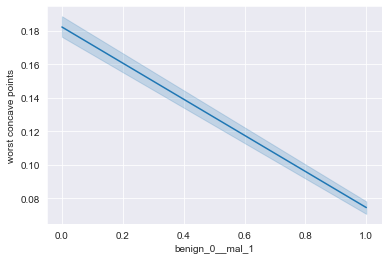

In [71]:
sns.lineplot(x='benign_0__mal_1',y='worst concave points',data=df)

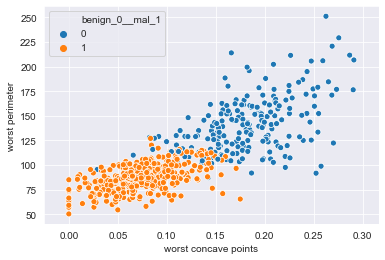

In [79]:
sns.scatterplot(x='worst concave points',y='worst perimeter',data=df,hue='benign_0__mal_1')

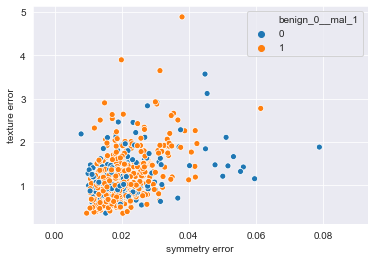

In [65]:
sns.scatterplot(x='symmetry error',y='texture error',data=df,hue='benign_0__mal_1')

In [ ]:
sns.distplot(df['worst concave points'])

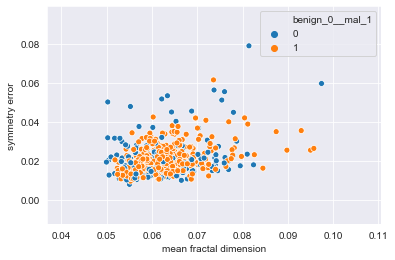

In [86]:
sns.scatterplot(x='mean fractal dimension',y='symmetry error',data=df,hue='benign_0__mal_1')

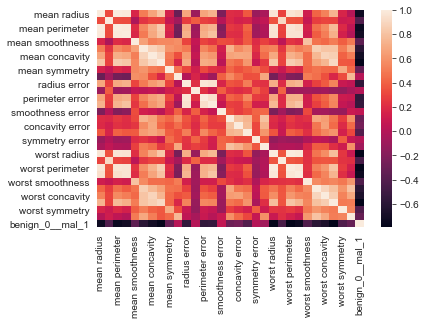

In [55]:
sns.heatmap(df.corr())

#### -ve Correlation

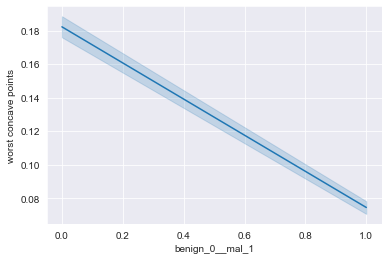

In [75]:
sns.lineplot(x='benign_0__mal_1',y='worst concave points',data=df)

### +ve Correlation

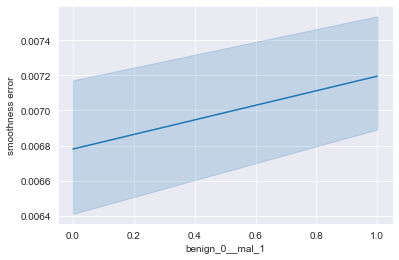

In [77]:
sns.lineplot(x='benign_0__mal_1',y='smoothness error',data=df)

### 0 Correlation

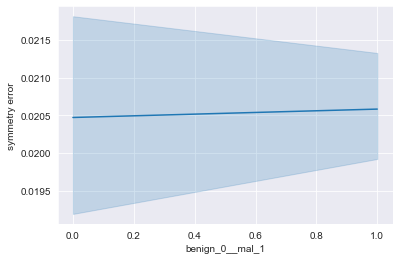

In [76]:
sns.lineplot(x='benign_0__mal_1',y='symmetry error',data=df)

In [88]:
X = df.drop('benign_0__mal_1',axis=1).values

In [100]:
y = df['benign_0__mal_1'].values

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=0.25,random_state=101)

In [108]:
scaler = MinMaxScaler()

In [109]:
X_train = scaler.fit_transform(X_train)

In [110]:
X_test = scaler.transform(X_test)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [129]:
model = Sequential()

In [133]:
X_train.shape

(426, 30)

In [134]:
model.add(Dense(units = 30 , activation='relu'))
model.add(Dense(units = 15 , activation='relu'))

#Bianry Classification
model.add(Dense(units = 1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [135]:
model.fit(x = X_train,y=y_train,
          epochs = 600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6903 - val_loss: 0.6689
Epoch 2/600
426/426 [==============================] - 0s 146us/sample - loss: 0.6586 - val_loss: 0.6397
Epoch 3/600
426/426 [==============================] - 0s 132us/sample - loss: 0.6266 - val_loss: 0.6064
Epoch 4/600
426/426 [==============================] - 0s 179us/sample - loss: 0.5887 - val_loss: 0.5635
Epoch 5/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5417 - val_loss: 0.5127
Epoch 6/600
426/426 [==============================] - 0s 125us/sample - loss: 0.4866 - val_loss: 0.4517
Epoch 7/600
426/426 [==============================] - 0s 220us/sample - loss: 0.4249 - val_loss: 0.3866
Epoch 8/600
426/426 [==============================] - 0s 153us/sample - loss: 0.3666 - val_loss: 0.3313
Epoch 9/600
426/426 [=

Epoch 75/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0568 - val_loss: 0.1216
Epoch 76/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0594 - val_loss: 0.1113
Epoch 77/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0584 - val_loss: 0.1178
Epoch 78/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0563 - val_loss: 0.1221
Epoch 79/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0545 - val_loss: 0.1140
Epoch 80/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0581 - val_loss: 0.1214
Epoch 81/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0550 - val_loss: 0.1184
Epoch 82/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0536 - val_loss: 0.1138
Epoch 83/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0559 - val_loss: 0.1134
Epoch 84/600
426/426 [========================

Epoch 152/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0436 - val_loss: 0.1331
Epoch 153/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0432 - val_loss: 0.1385
Epoch 154/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0439 - val_loss: 0.1283
Epoch 155/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0448 - val_loss: 0.1424
Epoch 156/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0437 - val_loss: 0.1290
Epoch 157/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0443 - val_loss: 0.1398
Epoch 158/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0469 - val_loss: 0.1275
Epoch 159/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0449 - val_loss: 0.1344
Epoch 160/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0455 - val_loss: 0.1269
Epoch 161/600
426/426 [==============

426/426 [==============================] - 0s 104us/sample - loss: 0.0385 - val_loss: 0.1417
Epoch 229/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0416 - val_loss: 0.1431
Epoch 230/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0386 - val_loss: 0.1332
Epoch 231/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0357 - val_loss: 0.1481
Epoch 232/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0402 - val_loss: 0.1430
Epoch 233/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0365 - val_loss: 0.1330
Epoch 234/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0398 - val_loss: 0.1394
Epoch 235/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0391 - val_loss: 0.1355
Epoch 236/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0360 - val_loss: 0.1363
Epoch 237/600
426/426 [============================

426/426 [==============================] - 0s 114us/sample - loss: 0.0316 - val_loss: 0.1476
Epoch 305/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0325 - val_loss: 0.1559
Epoch 306/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0308 - val_loss: 0.1447
Epoch 307/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0335 - val_loss: 0.1513
Epoch 308/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0353 - val_loss: 0.1449
Epoch 309/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0367 - val_loss: 0.1504
Epoch 310/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0333 - val_loss: 0.1464
Epoch 311/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0316 - val_loss: 0.1502
Epoch 312/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0318 - val_loss: 0.1529
Epoch 313/600
426/426 [============================

426/426 [==============================] - 0s 120us/sample - loss: 0.0282 - val_loss: 0.1740
Epoch 381/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0279 - val_loss: 0.1624
Epoch 382/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0331 - val_loss: 0.1705
Epoch 383/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0261 - val_loss: 0.1636
Epoch 384/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0260 - val_loss: 0.1617
Epoch 385/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0269 - val_loss: 0.1619
Epoch 386/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0259 - val_loss: 0.1680
Epoch 387/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0263 - val_loss: 0.1676
Epoch 388/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0265 - val_loss: 0.1710
Epoch 389/600
426/426 [============================

426/426 [==============================] - 0s 113us/sample - loss: 0.0231 - val_loss: 0.1831
Epoch 457/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0220 - val_loss: 0.1791
Epoch 458/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0252 - val_loss: 0.1813
Epoch 459/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0233 - val_loss: 0.1966
Epoch 460/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0246 - val_loss: 0.1800
Epoch 461/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0222 - val_loss: 0.1916
Epoch 462/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0232 - val_loss: 0.1924
Epoch 463/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0232 - val_loss: 0.1976
Epoch 464/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0223 - val_loss: 0.1978
Epoch 465/600
426/426 [============================

426/426 [==============================] - 0s 119us/sample - loss: 0.0217 - val_loss: 0.2080
Epoch 533/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0194 - val_loss: 0.2168
Epoch 534/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0203 - val_loss: 0.2241
Epoch 535/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0187 - val_loss: 0.2137
Epoch 536/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0213 - val_loss: 0.2397
Epoch 537/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0214 - val_loss: 0.2212
Epoch 538/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0259 - val_loss: 0.2195
Epoch 539/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0201 - val_loss: 0.2234
Epoch 540/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0232 - val_loss: 0.2284
Epoch 541/600
426/426 [============================

In [138]:
losses = pd.DataFrame(model.history.history)

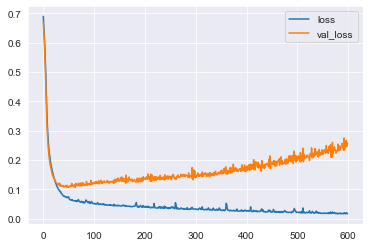

In [139]:
losses.plot()

### Clearly above model is overfitting

##### So Now We Use Early Stopping Callback To Stop Overfitting

In [140]:
model = Sequential()

model.add(Dense(units = 30 , activation='relu'))
model.add(Dense(units = 15 , activation='relu'))

#Bianry Classification
model.add(Dense(units = 1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [141]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [145]:
model.fit(x = X_train,y=y_train,
          epochs = 600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6980 - val_loss: 0.6836
Epoch 2/600
426/426 [==============================] - 0s 177us/sample - loss: 0.6712 - val_loss: 0.6636
Epoch 3/600
426/426 [==============================] - 0s 166us/sample - loss: 0.6483 - val_loss: 0.6339
Epoch 4/600
426/426 [==============================] - 0s 139us/sample - loss: 0.6142 - val_loss: 0.5983
Epoch 5/600
426/426 [==============================] - 0s 137us/sample - loss: 0.5749 - val_loss: 0.5519
Epoch 6/600
426/426 [==============================] - 0s 128us/sample - loss: 0.5296 - val_loss: 0.5078
Epoch 7/600
426/426 [==============================] - 0s 144us/sample - loss: 0.4851 - val_loss: 0.4597
Epoch 8/600
426/426 [==============================] - 0s 141us/sample - loss: 0.4398 - val_loss: 0.4144
Epoch 9/600
426/426 [==============================] - 0s 129us/sample - loss: 0.3989 - val_loss: 0.3734
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0576 - val_loss: 0.1137
Epoch 79/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0564 - val_loss: 0.1174
Epoch 80/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0566 - val_loss: 0.1150
Epoch 00080: early stopping


In [146]:
losses = pd.DataFrame(model.history.history)

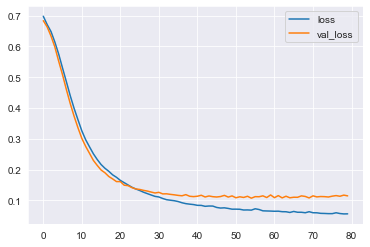

In [148]:
losses.plot()

##### So Now We Dropout TechniqueTo Stop Overfitting Problem


In [191]:
model = Sequential()

model.add(Dense(units = 30 , activation='relu'))
model.add(Dropout(rate=0.40))

model.add(Dense(units = 15 , activation='relu'))
model.add(Dropout(rate=0.40))

model.add(Dense(units = 10 , activation='relu'))
model.add(Dropout(rate=0.40))

#Bianry Classification
model.add(Dense(units = 1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [192]:
model.fit(x = X_train,y=y_train,
          epochs = 600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6956 - val_loss: 0.6747
Epoch 2/600
426/426 [==============================] - 0s 158us/sample - loss: 0.6846 - val_loss: 0.6722
Epoch 3/600
426/426 [==============================] - 0s 151us/sample - loss: 0.6768 - val_loss: 0.6705
Epoch 4/600
426/426 [==============================] - 0s 155us/sample - loss: 0.6703 - val_loss: 0.6619
Epoch 5/600
426/426 [==============================] - 0s 151us/sample - loss: 0.6648 - val_loss: 0.6539
Epoch 6/600
426/426 [==============================] - 0s 134us/sample - loss: 0.6579 - val_loss: 0.6398
Epoch 7/600
426/426 [==============================] - 0s 141us/sample - loss: 0.6210 - val_loss: 0.6183
Epoch 8/600
426/426 [==============================] - 0s 186us/sample - loss: 0.6227 - val_loss: 0.5874
Epoch 9/600
426/426 [==============================] - 0s 153us/sample - loss: 0.5871 - val_loss: 0.5535
Epoch 10/60

426/426 [==============================] - 0s 148us/sample - loss: 0.1289 - val_loss: 0.1069
Epoch 78/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1312 - val_loss: 0.0939
Epoch 79/600
426/426 [==============================] - 0s 160us/sample - loss: 0.1186 - val_loss: 0.1102
Epoch 80/600
426/426 [==============================] - 0s 177us/sample - loss: 0.1474 - val_loss: 0.1012
Epoch 81/600
426/426 [==============================] - 0s 165us/sample - loss: 0.1258 - val_loss: 0.0947
Epoch 82/600
426/426 [==============================] - 0s 146us/sample - loss: 0.1371 - val_loss: 0.0931
Epoch 83/600
426/426 [==============================] - 0s 144us/sample - loss: 0.1104 - val_loss: 0.1028
Epoch 84/600
426/426 [==============================] - 0s 153us/sample - loss: 0.1182 - val_loss: 0.0838
Epoch 85/600
426/426 [==============================] - 0s 146us/sample - loss: 0.1245 - val_loss: 0.1033
Epoch 86/600
426/426 [==============================] - 0s 

In [194]:
losses = pd.DataFrame(model.history.history)

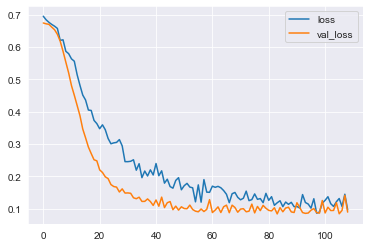

In [195]:
losses.plot()

### Model Evaluation

In [196]:
preds = model.predict_classes(X_test)

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [199]:
print(confusion_matrix(y_test ,preds))

[[54  1]
 [ 1 87]]
